In [1]:
# imports 
%matplotlib inline

from IPython.display import YouTubeVideo
from IPython.display import Math

import sklearn
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

import numpy as np
import numpy.random as rng

import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups

In [2]:
# diabetes_data
diabetes_data = datasets.load_diabetes()
print(diabetes_data.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

## Bayes / Navie bayes problem 3

In [9]:
diabetes_data.data.shape

(442, 10)

In [7]:
N = len(diabetes_data.target)
i = rng.randint(0,N-1,100)
diabetes_data.data[i,:].shape

(100, 10)

In [48]:
X_train = diabetes_data.data[i,np.newaxis,i]
y_train = diabetes_data.target[i]

print(X_train.shape)
print(y_train.shape)

(100, 10)
(100, 1)


In [49]:
# A linear model
model = LinearRegression()

# Train the model using the training sets
# i.e., find parameters that make the model best fit the data
model.fit(X_train, y_train)

# What are the parameters we found to be best?
# print('Optimal parameters: ')
# print('slope: {:.3f}\nintercept: {:.3f}'.format(model.coef_[0], model.intercept_ ))

model.coef_.shape

(1, 10)

In [50]:
y_pred = model.predict(X_train)

ValueError: x and y must be the same size

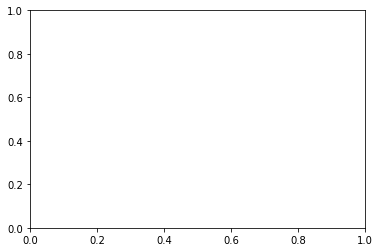

In [51]:
plt.scatter( X_train, y_train )
plt.plot( X_train, y_pred, color='black', linewidth=2 )
plt.ylabel('Diabetes progression')
# plt.xlabel('Average blood pressure');

(array([ 5.,  7., 11.,  7., 13., 13., 17., 14.,  9.,  4.]),
 array([-123.65700507, -100.07801622,  -76.49902736,  -52.92003851,
         -29.34104965,   -5.76206079,   17.81692806,   41.39591692,
          64.97490577,   88.55389463,  112.13288348]),
 <a list of 10 Patch objects>)

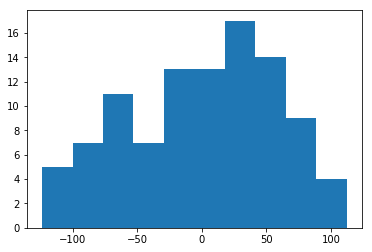

In [19]:
# plot a histogram of the errors
plt.hist(y_pred-y_train)

## Solve using linear algebra

In [53]:
X_train = diabetes_data.data[i,:]
y_train = diabetes_data.target[i]

In [54]:
p = np.linalg.lstsq(X_train,y_train)
p[0].shape

/groups/ahrens/home/limj2/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(10,)

In [55]:
X1 = np.concatenate((X_train, np.ones((X_train.shape[0],1))), axis=1)
X1.shape

(100, 11)

In [56]:
p,resid,rank,s = np.linalg.lstsq(X1, y_train) # Note this is not explicitly computing the SVD
y_linsolv_pred = np.matmul( X1, p ); # Compare this to the previous output

/groups/ahrens/home/limj2/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [57]:
y_linsolv_pred - y_pred  # output is very tiny, so that's what we want!

array([[ 0.00000000e+00, -6.54467402e+01, -2.53506351e+01, ...,
         4.52213343e+01, -6.33375420e+01, -8.98492103e+00],
       [ 6.54467402e+01,  2.84217094e-14,  4.00961051e+01, ...,
         1.10668075e+02,  2.10919817e+00,  5.64618192e+01],
       [ 2.53506351e+01, -4.00961051e+01, -5.68434189e-14, ...,
         7.05719694e+01, -3.79869069e+01,  1.63657141e+01],
       ...,
       [-4.52213343e+01, -1.10668075e+02, -7.05719694e+01, ...,
         2.84217094e-14, -1.08558876e+02, -5.42062554e+01],
       [ 6.33375420e+01, -2.10919817e+00,  3.79869069e+01, ...,
         1.08558876e+02,  8.52651283e-14,  5.43526210e+01],
       [ 8.98492103e+00, -5.64618192e+01, -1.63657141e+01, ...,
         5.42062554e+01, -5.43526210e+01,  1.42108547e-13]])

## Fitting a quadratic function with linear regression

Linear regression doesn't mean fitting lines. It means fitting linear basis functions.

$ y_i = p_0 + p_1 x_{i,1} + p_2 x_{i,2} + p_3 x_{i,1}^2 + p_4 x_{i,2}^2 + p_5 x_{i,1} x_{i,2} $

Regularization is a good idea here, but not necessary. One thing that regularization does is to give preference to some kind  of solutions.

In [60]:
X_train_poly = X_train[:,[1,2]]

X_poly = np.concatenate((np.ones((X_train_poly.shape[0],1)), X_train_poly), axis=1)
X_poly.shape

(100, 3)

In [59]:
# Add quadratic terms
X_poly = np.concatenate((X_poly, (X_train_poly[:,np.newaxis,0]**2)), axis=1)
X_poly = np.concatenate((X_poly, (X_train_poly[:,np.newaxis,1]**2)), axis=1)
X_poly = np.concatenate((X_poly, (X_train_poly[:,np.newaxis,0]*X_train_poly[:,np.newaxis,1])), axis=1)
X_poly.shape

(100, 5)

In [61]:
p_poly,resid,rank,s = np.linalg.lstsq(X_poly,y_train)
y_pred_poly_lsq = np.matmul(X_poly,p_poly)

/groups/ahrens/home/limj2/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [ ]:
poly_model = Pipeline(
    [('poly', PolynomialFeatures(degree=3)), 
     ('linear', LinearRegression())])

# Class notes
## Bayes / Navie bayes problem 3

In [9]:
diabetes_data.data.shape

(442, 10)

In [7]:
N = len(diabetes_data.target)
i = rng.randint(0,N-1,100)
diabetes_data.data[i,:].shape

(100, 10)

In [48]:
X_train = diabetes_data.data[i,np.newaxis,i]
y_train = diabetes_data.target[i]

print(X_train.shape)
print(y_train.shape)

(100, 10)
(100, 1)


In [49]:
# A linear model
model = LinearRegression()

# Train the model using the training sets
# i.e., find parameters that make the model best fit the data
model.fit(X_train, y_train)

# What are the parameters we found to be best?
# print('Optimal parameters: ')
# print('slope: {:.3f}\nintercept: {:.3f}'.format(model.coef_[0], model.intercept_ ))

model.coef_.shape

(1, 10)

In [50]:
y_pred = model.predict(X_train)

ValueError: x and y must be the same size

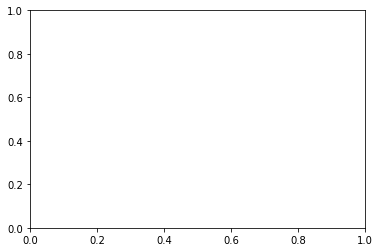

In [51]:
plt.scatter( X_train, y_train )
plt.plot( X_train, y_pred, color='black', linewidth=2 )
plt.ylabel('Diabetes progression')
# plt.xlabel('Average blood pressure');

(array([ 5.,  7., 11.,  7., 13., 13., 17., 14.,  9.,  4.]),
 array([-123.65700507, -100.07801622,  -76.49902736,  -52.92003851,
         -29.34104965,   -5.76206079,   17.81692806,   41.39591692,
          64.97490577,   88.55389463,  112.13288348]),
 <a list of 10 Patch objects>)

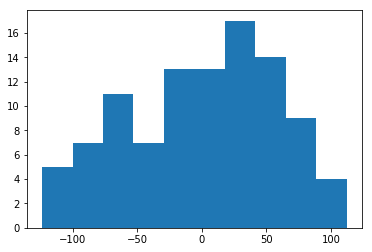

In [19]:
# plot a histogram of the errors
plt.hist(y_pred-y_train)

## Solve using linear algebra

In [53]:
X_train = diabetes_data.data[i,:]
y_train = diabetes_data.target[i]

In [54]:
p = np.linalg.lstsq(X_train,y_train)
p[0].shape

/groups/ahrens/home/limj2/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(10,)

In [55]:
X1 = np.concatenate((X_train, np.ones((X_train.shape[0],1))), axis=1)
X1.shape

(100, 11)

In [56]:
p,resid,rank,s = np.linalg.lstsq(X1, y_train) # Note this is not explicitly computing the SVD
y_linsolv_pred = np.matmul( X1, p ); # Compare this to the previous output

/groups/ahrens/home/limj2/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [57]:
y_linsolv_pred - y_pred  # output is very tiny, so that's what we want!

array([[ 0.00000000e+00, -6.54467402e+01, -2.53506351e+01, ...,
         4.52213343e+01, -6.33375420e+01, -8.98492103e+00],
       [ 6.54467402e+01,  2.84217094e-14,  4.00961051e+01, ...,
         1.10668075e+02,  2.10919817e+00,  5.64618192e+01],
       [ 2.53506351e+01, -4.00961051e+01, -5.68434189e-14, ...,
         7.05719694e+01, -3.79869069e+01,  1.63657141e+01],
       ...,
       [-4.52213343e+01, -1.10668075e+02, -7.05719694e+01, ...,
         2.84217094e-14, -1.08558876e+02, -5.42062554e+01],
       [ 6.33375420e+01, -2.10919817e+00,  3.79869069e+01, ...,
         1.08558876e+02,  8.52651283e-14,  5.43526210e+01],
       [ 8.98492103e+00, -5.64618192e+01, -1.63657141e+01, ...,
         5.42062554e+01, -5.43526210e+01,  1.42108547e-13]])

## Fitting a quadratic function with linear regression

Linear regression doesn't mean fitting lines. It means fitting linear basis functions.

$ y_i = p_0 + p_1 x_{i,1} + p_2 x_{i,2} + p_3 x_{i,1}^2 + p_4 x_{i,2}^2 + p_5 x_{i,1} x_{i,2} $

Regularization is a good idea here, but not necessary. One thing that regularization does is to give preference to some kind  of solutions.

In [60]:
X_train_poly = X_train[:,[1,2]]

X_poly = np.concatenate((np.ones((X_train_poly.shape[0],1)), X_train_poly), axis=1)
X_poly.shape

(100, 3)

In [59]:
# Add quadratic terms
X_poly = np.concatenate((X_poly, (X_train_poly[:,np.newaxis,0]**2)), axis=1)
X_poly = np.concatenate((X_poly, (X_train_poly[:,np.newaxis,1]**2)), axis=1)
X_poly = np.concatenate((X_poly, (X_train_poly[:,np.newaxis,0]*X_train_poly[:,np.newaxis,1])), axis=1)
X_poly.shape

(100, 5)

In [61]:
p_poly,resid,rank,s = np.linalg.lstsq(X_poly,y_train)
y_pred_poly_lsq = np.matmul(X_poly,p_poly)

/groups/ahrens/home/limj2/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [ ]:
poly_model = Pipeline(
    [('poly', PolynomialFeatures(degree=3)), 
     ('linear', LinearRegression())])